# **AIPI 590 - XAI | Assignment #1**
### Interpretable ML Assignment
### Lindsay Gross


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/18r50P2SgkHUKty02ZOacZssCm6J902fk)


- Dataset link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code
- Dataset title: Telco Customer Churn. 
- Collaborators: BlastChar (Owner). 
- License: Data files © Original Authors. 



## **Use to run colab:**

In [54]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [55]:
import os

# check if running in google colab
try:
    import google.colab
    IN_COLAB = True
    from google.colab import drive
except ImportError:
    IN_COLAB = False

repo_name = "Interpretable-ML"
git_path = "https://github.com/lindsaygross/Interpretable-ML.git"

if IN_COLAB:
    print("running in google colab...")

    # mount google drive
    drive.mount('/content/drive')

    # navigate to drive location
    drive_path = '/content/drive/MyDrive/Duke ME AIPI'
    os.makedirs(drive_path, exist_ok=True)
    %cd "{drive_path}"

    # clone or update repo
    if not os.path.exists(repo_name):
        !git clone {git_path}
    else:
        %cd {repo_name}
        !git pull origin main
        %cd ..

    %cd {repo_name}

    # install dependencies
    if os.path.exists("requirements.txt"):
        !pip install -r requirements.txt
    else:
        !pip install pandas numpy matplotlib seaborn scikit-learn

    # verify csv file exists
    csv_file = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
    if os.path.exists(csv_file):
        print(f"csv file found: {csv_file}")
    else:
        print("csv file not found")

else:
    # local setup
    if os.path.exists("requirements.txt"):
        !pip install -r requirements.txt
    else:
        print("requirements.txt not found")

You should consider upgrading via the '/Users/lindsaygross/ME AIPI Classes/XAI/Interpretable-ML/.venv-1/bin/python3 -m pip install --upgrade pip' command.


## **Dependencies**

In [56]:
import numpy as np
import pandas as pd


# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, roc_auc_score, RocCurveDisplay, roc_curve

# statsmodels libraries (for Durbin-Watson test)
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.gam.api import GLMGam, BSplines, BSplines


import statsmodels.stats.api 
import statsmodels.stats.diagnostic
from statsmodels.stats.diagnostic import het_breuschpagan

import pygam
from pygam import LogisticGAM, s # allows for flexible non-linear relationships
from pygam import LinearGAM, s

from scipy.integrate import simpson





## **Exploratory Data Analysis**
**Context:**
This dataset includes information about various customers who left their job within the last month.  


Each row in the dataset represents a customer, each column contains customer’s attributes, descibed below. The raw data contains 7043 rows (customers) and 21 columns (features).




## **Explanation of the Content of Dataset**

**Each row represents a single customer, each column contains the following customer’s attributes** 
<br> 
<br>
**Each column contains customer’s attributes as follows:**

**customerID:** The individual customer
<br> 
<br>
**gender:** Whether the customer is a male or a female
<br>
<br>
**SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0)
<br>
<br>
**Partner:** Whether the customer has a partner or not (Yes, No)
<br>
<br>
**Dependents:** Whether the customer has dependents or not (Yes, No)
<br>
<br>
**Tenure:** Number of months the customer has stayed with the company
<br>
<br>
**PhoneService:** Whether the customer has a phone service or not (Yes, No
<br>
<br>
**MultipleLines:** Whether the customer has multiple lines or not (Yes, No, No phone service)
<br>
<br>
**InternetService:** Customer’s internet service provider (DSL, Fiber optic, No)
<br>
<br>
**OnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service)
<br>
<br>
**OnlineBackup:** Whether the customer has online backup or not (Yes, No, No internet service)
<br>
<br>
**DeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service)
<br>
<br>
**TechSupport:** Whether the customer has tech support or not (Yes, No, No internet service)
<br>
<br>
**StreamingTV:** Whether the customer has streaming TV or not (Yes, No, No internet service)
<br>
<br>
**StreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service)
<br>
<br>
**Contract:** The contract term of the customer (Month-to-month, One year, Two year)
<br>
<br>
**PaperlessBilling:** Whether the customer has paperless billing or not (Yes, No)
<br>
<br>
**PaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
<br>
<br>
**MonthlyCharges:** The amount charged to the customer monthly
<br>
<br>
**TotalCharges:** The total amount charged to the customer
<br>
<br>
**Churn:** Whether the customer churned or not (Yes or No)
<br>
<br>


In [57]:
# Used Claude Sonnet 4 at 4:45pm 9/13/2025 to understand logic on how to load data in colab and in local environment.

"""
Perform an exploratory analysis of the dataset to understand the relationships between different
features and the target variable (churn). Use appropriate visualizations and statistical methods
to determine whether assumptions about linear, logistic, and GAM models are met.
"""
# load the data
try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("loaded from local directory")
except:
    try:
        df = pd.read_csv('/content/drive/MyDrive/Duke ME AIPI/Interpretable-ML/WA_Fn-UseC_-Telco-Customer-Churn.csv')
        print("loaded from colab repo")
    except:
        df = pd.read_csv('/content/drive/MyDrive/Explainable AI/WA_Fn-UseC_-Telco-Customer-Churn.csv')
        print("loaded from colab drive")

df.head()

# Convert 'TotalCharges' to numeric so that we can analyze the numeric effect on churn later on
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
df.info()




loaded from local directory
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7

In [58]:
# describe the data
print(df.info())
print(df.shape)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [59]:
# check for missing values
print(df.isnull().sum())    

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [60]:
# check for duplicate rows
duplicate_rows = df.duplicated()
df[duplicate_rows]
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


Churn
No     5163
Yes    1869
Name: count, dtype: int64


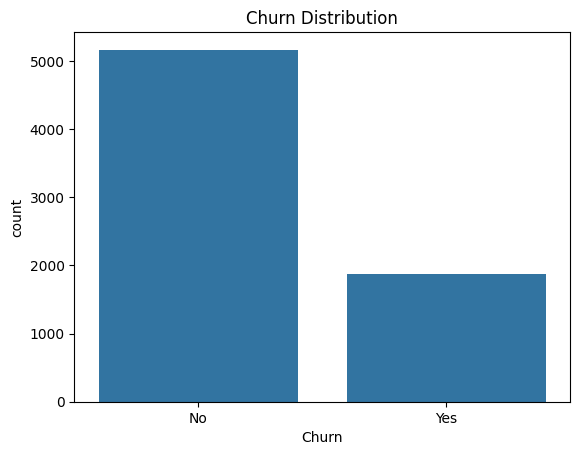

In [61]:
# Used claude at 4:50pm to help create binary column for churn

# visualize the churn distribution
print(df['Churn'].value_counts())
df['ChurnBinary'] = df['Churn'].map({'No': 0, 'Yes': 1}) # create a binary column for churn
# The above code snippet was created with the help of Claude Sonnet 4 at 11:28am on 9/14/2025.
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

### Churn Distribution
The target variable `Churn` is imbalanced: most customers stay, while a smaller amount leave.  
This imbalance is important because it can affect model performance, especially for **linear** and **logistic regression** models. 


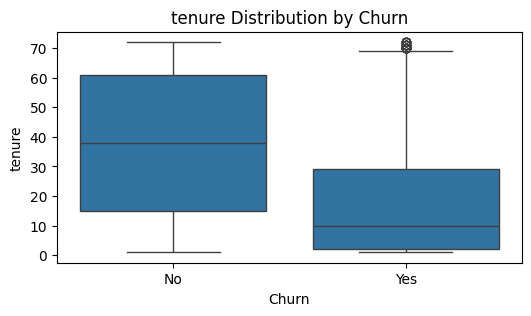

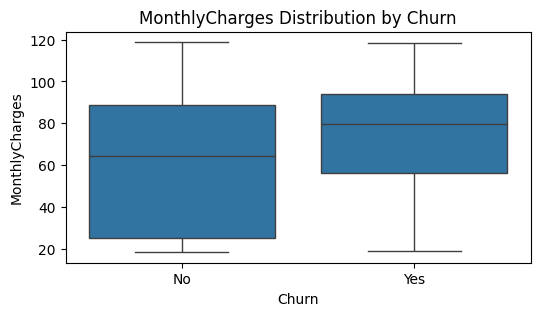

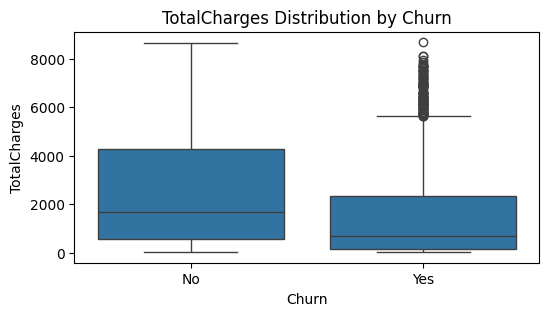

In [62]:
# Numerical features distribution vs Churn
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(6, 3))  # Used Claude Sonnet 4 at 5:00pm 9/13/2025 to find best figure size
    sns.boxplot(x='Churn', y=feature, data=df) 
    plt.title(f'{feature} Distribution by Churn')
    plt.show()

## **EDA Numeric Features vs Churn**

**Tenure Distribution by Churn**

- Customers who churned generally have shorter tenure with the company.
- Most churned customers left within the first ~20 months.
- Non-churned customers are more spread out, with many staying long-term.

Tenure has a strong negative relationship with churn. This relationship looks non-linear (sharp drop in early months), which may not be well captured by linear regression, but logistic regression or a GAM can handle it better.

**Summary of above EDA**
---
<br>
- The above eda display a simple analysis of the dataframe calling the info function.

# Assumptions Explained

**Linearity**

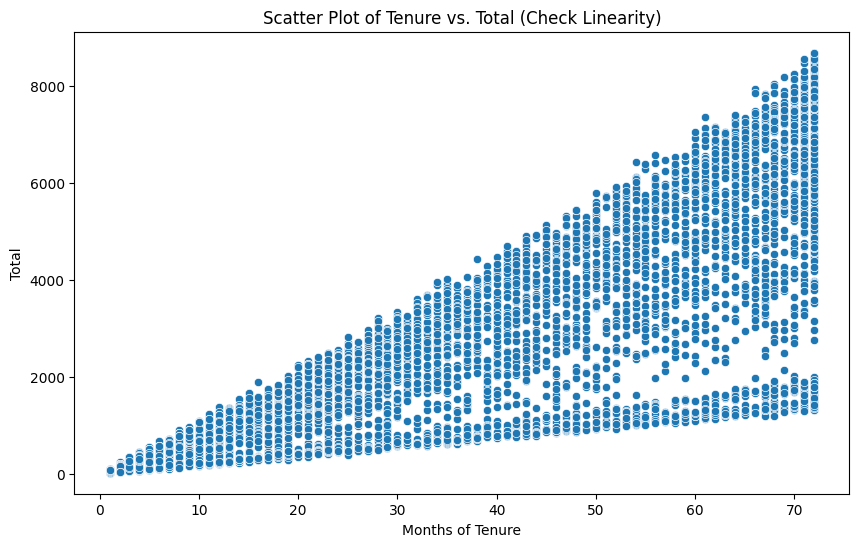

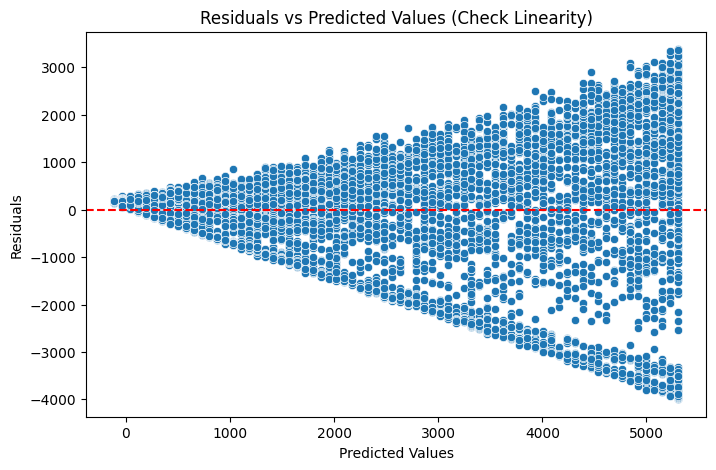

In [63]:
# Check for assumptions of linearity

# Scatter plot of tenure vs TotalCharges
df_cleaned = df.dropna(subset=['tenure', 'TotalCharges'])
plt.figure(figsize=(10,6))
sns.scatterplot(x='tenure', y='TotalCharges', data=df_cleaned)
plt.title('Scatter Plot of Tenure vs. Total (Check Linearity)')
plt.xlabel('Months of Tenure')
plt.ylabel('Total')
plt.show()


# Residuals vs Predicted Values
X = df[['tenure']]
X = sm.add_constant(X)   # add constant for intercept
y = df['TotalCharges']

model = sm.OLS(y, X).fit()
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(8,5)) # Used Claude Sonnet 4 at 3:56pm 9/14/2025 to help determine figure size
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Check Linearity)")
plt.show()


The scatter plot of tenure vs total charges shows a generally positive linear trend, suggesting that the assumption of linearity is appropriate.  

The residuals vs predicted values plot shows points scattered around zero without a strong curved pattern. There is some spread as the predicted values increase, but the overall trend does not show a clear curve. This suggests that the linearity assumption is mostly satisfied, making linear regression appropriate here.


**Independence of Observations**

In [64]:
# Check for assumptions of Independence of Observations

# check for duplicate customer IDs
if len(df['customerID']) == len(df['customerID'].unique()):
    print("All customer IDs are unique. No duplicates found.")
else:
    print("There are duplicate customers")
    
# Durbin-Watson test for first order autocorrelation

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

df['ChurnBinary'] = df['Churn'].map({'No': 0, 'Yes': 1}) # create a binary column for churn

X = df[['tenure', 'MonthlyCharges', 'TotalCharges']].apply(pd.to_numeric, errors='coerce') # Used Claude Sonnet 4 at 3:11pm 9/14/2025 to help with this code snippet
y = df['ChurnBinary']

# drop missing values
X = X.dropna()
Y = y.loc[X.index] # used Claude Sonnet 4 at 3:15pm 9/14/2025 to help with this code snippet

X = sm.add_constant(X) # add constant term for intercept using statsmodels
model = sm.Logit(Y, X)
result = model.fit()
# Used claude Sonnet 4 at 3:17 pm 9/14/2025 to generate the code snippet above

residuals = result.resid_response # get the residuals. resid_response gives the difference between observed and predicted values
# used claude Sonnet 4 at 3:20pm 9/14/2025 to help with the above code snippet
dw = durbin_watson(residuals) 
print(f'Durbin-Watson statistic: {dw}')

All customer IDs are unique. No duplicates found.
Optimization terminated successfully.
         Current function value: 0.453372
         Iterations 7
Durbin-Watson statistic: 2.00336752535415


 **Uniqueness/Check for Duplicates**

All customer IDs in the dataset are unique, so there aren’t any duplicates. This shows that each customer is an independent observation.  

---
 **Independence of Observations (Durbin-Watson Test)**

The **Durbin-Watson test** tests for first-order autocorrelation (independence of observations)  on the residuals of our logistic regression model. The test value ranges from 0 to 4, where:

- 0 indicates strong positive autocorrelation (residuals highly related to each other),
- 2 indicates no autocorrelation (residuals are independent),
- 4 indicates strong negative autocorrelation.

Since the result was **~2.00**, this indicates that there is **no evidence** of autocorrelation in the residuals, meaning that the assumption of independence of observations is satisfied.


**Homoscedasticity**

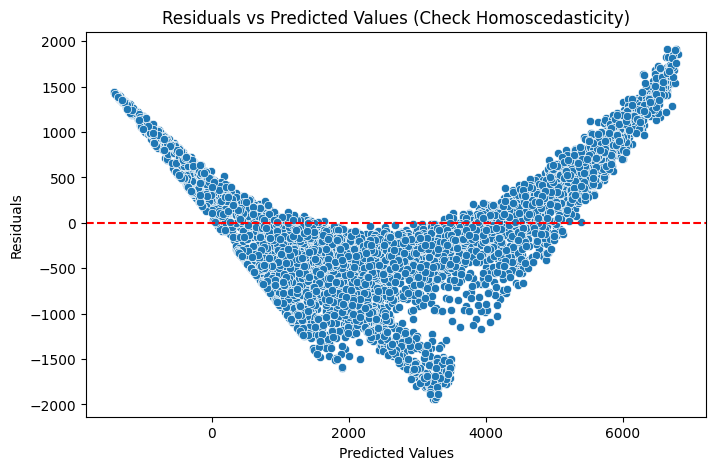

{'Lagrange multiplier statistic': 523.1080217202233, 'p-value': 2.5617477520957806e-114, 'f-value': 282.45408718883186, 'f p-value': 1.0278171038678204e-118}


In [65]:
# Check for assumptions of Homoscedasticity

X = df[['tenure', 'MonthlyCharges']]
X = sm.add_constant(X)   
y = df['TotalCharges']

model = sm.OLS(y, X).fit() # Used Claude Sonnet 4 at 3:39pm 9/14/2025 to help with this code line
residuals = model.resid
fitted = model.fittedvalues

# Residuals vs Predicted plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Check Homoscedasticity)")
plt.show()

#Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X)
labels = ['Lagrange multiplier statistic', 'p-value', 
          'f-value', 'f p-value'] # Used Claude Sonnet 4 at 3:50pm 9/14/2025 to help with this code snippet
print(dict(zip(labels, bp_test)))





The residuals vs predicted values plot is not uniform;  the spread of residuals gets wider as the predicted values increase. This pattern indicates that the variance is not constant, which indicates heteroscedasticity.


**Normality of Residuals**

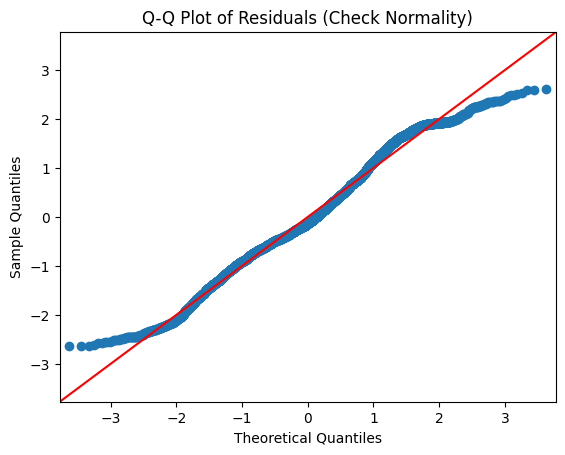

In [66]:
# Check for assumptions of Normality of Residual

# Use Q-Q plot for normality of residuals
sm.qqplot(residuals, line='45', fit=True) # Used Claude Sonnet 4 at 3:510pm 9/14/2025 to help with this code line
plt.title("Q-Q Plot of Residuals (Check Normality)")
plt.show()


The **Q-Q plot** compares the residuals to a normal distribution. If the points fall close to the 45-degree line, the residuals are approximately normal. Deviations from the line, suggest the residuals are not normally distributed.

The Q-Q plot shows that the residuals mostly follow the 45-degree line, indicating that the residuals are approximate normal. Although, since there are small deviations the upper and lower and upper ends, this might indicate that the residuals are not perfetly normal in distribution, meaning that the normality assumption is only partially met.


**No Multicollinearity**

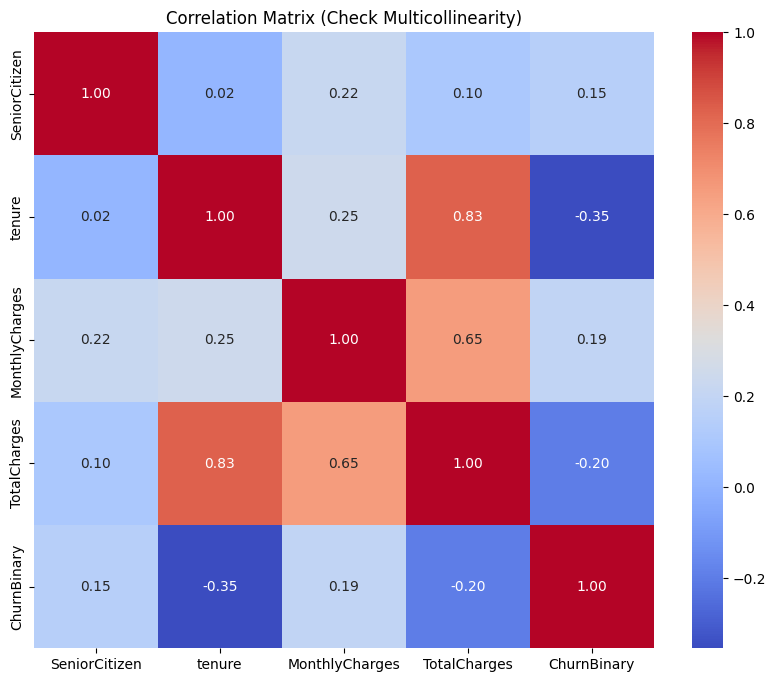

In [67]:
# Check for assumptions of No Multicollinearity
# Correlation Matrix


plt.figure(figsize=(10,8)) # Used Claude Sonnet 4 at 4:00pm 9/14/2025 to help determine figure size
sns.heatmap(
    df.select_dtypes(include=['float64','int64']).corr(),  
    annot=True, fmt=".2f", cmap="coolwarm" # Used Claude Sonnet 4 at 4:02pm 9/14/2025 to help with this code line
)
plt.title("Correlation Matrix (Check Multicollinearity)")
plt.show()




The correlation matrix shows how strongly predictors are related to each other. Most variables have low to moderate correlations, but there are some high correlations (ex: tenure and TotalCharges, tenure and Log_Total, both above 0.8). This suggests possible multicollinearity, which could affect regression models by inflating variance of coefficients.

**Influential Outliers**

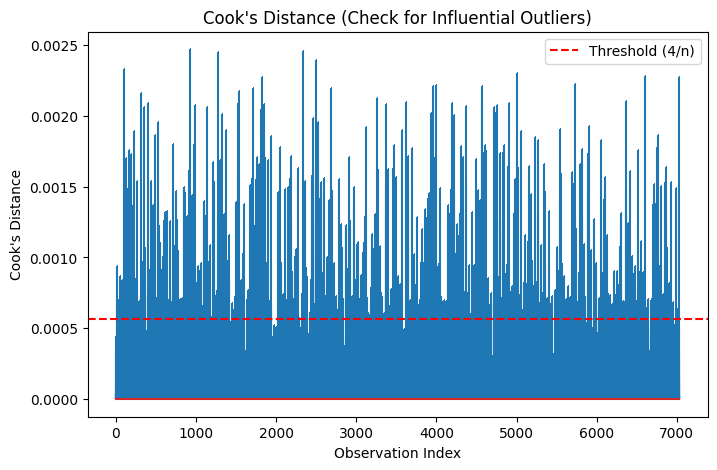

In [68]:
# Check for assumptions of No Influential Outliers

# use Cook's Distance to identify influential outliers
X = df[['tenure', 'MonthlyCharges']]
X = sm.add_constant(X)  
y = df['TotalCharges']

# Fit OLS model
model = sm.OLS(y, X).fit() # Used Claude Sonnet 4 at 7:37pm 9/14/2025 to help with this code line

# Get influence measures
influence = model.get_influence()
cooks_d, p_values = influence.cooks_distance 
# Used Claude Sonnet 4 at 7:40pm 9/14/2025 to help with this code block

# Plot Cook's Distance
plt.figure(figsize=(8,5))
plt.stem(cooks_d, markerfmt=",") # Used Claude Sonnet 4 at 7:42pm 9/14/2025 to help with this code line
plt.axhline(4/len(df), color='red', linestyle='--', label="Threshold (4/n)") # Used Claude Sonnet 4 at 7:43pm 9/14/2025 to help with this code line
plt.title("Cook's Distance (Check for Influential Outliers)")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()


We checked for influential outliers using Cook’s Distance. The red line shows the threshold 4/n (where n is the number of observations). Any point above this line may have a significant influence on the regression model. Since most points are below this line, this indicates that no single observation has a strong influence on the model. This suggests the dataset does not have influential outliers.

In [69]:
# Data preprocessing 

#  Encode categorical variables
df_model = pd.get_dummies(df, drop_first=True)  # drop_first to avoid dummy variable trap. 
# The above code snippet was created with the help of Claude Sonnet 4 at 7:58am on 9/14/2025.

# Define target and features
y = df_model['Churn_Yes']   # churn column encoded (0 = No, 1 = Yes)
X = df_model.drop(columns=['Churn_Yes'])  # drop only target column; customerID is not present after get_dummies


# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)



Train shape: (5625, 7062)
Test shape: (1407, 7062)


### Data Preprocessing

Before modeling, we encoded categorical variables into dummy variables so that the models can interpret them as numerical inputs. We converted the target variable `Churn' into binary values (0 = No, 1 = Yes). Then, we split the dataset into training and testing sets to keep the churn proportion consistent across splits.  

Then, we standardized the numerical features using `StandardScaler` to ensure that features like  tenure, monthly charges, and total charges are on the same scale to  help models like logistic regression and GAM converge more effectively.


In [70]:
# Linear Regression Model

# Fit model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predict and evaluate model
y_pred_lin = lin_reg.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R²:", r2_score(y_test, y_pred_lin))

# Show coefficients
coef = pd.Series(lin_reg.coef_, index=X_train.columns)
print("\nTop coefficients:")
print(coef.sort_values(ascending=False).head(10)) # show top 10 positive coefficients


MSE: 0.045927163738996656
R²: 0.7646653385633946

Top coefficients:
ChurnBinary                       0.197085
InternetService_Fiber optic       0.024782
PaymentMethod_Electronic check    0.018401
StreamingMovies_Yes               0.009055
MultipleLines_Yes                 0.008250
customerID_8631-NBHFZ             0.008094
customerID_8580-QVLOC             0.008059
customerID_2321-OMBXY             0.007774
customerID_8559-CIZFV             0.007664
customerID_7359-SSBJK             0.007564
dtype: float64


### Linear Regression Review
We fit a linear regression model by treating churn as a continuous variable (0 = no churn, 1 = churned).  The model got an R² of about 76%, meaning that it explains 76% of the variation in churn, which is relatively high. The model found the MSE = ~0.046, meaning that the predicitons are not far off on average. 


The coefficients suggest that factors like InternetService_Fiber optic and PaymentMethod_Electronic check are **positively** associated with churn, meaning that customers with these characteristics are more likely to churn.


Since linear regression can predict values outside of 0 and 1, this isn’t the best tool for churn prediction, however it does provide insight about which features might matter most.  


In [71]:
# Logistic Regression Model

# Define features (X) and target (y)
X = df[['tenure', 'MonthlyCharges']]  
y = df['ChurnBinary']  # 0 = stayed, 1 = churned

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
log_reg = LogisticRegression(max_iter=1000) # Used Claude Sonnet 4 at 8:15pm 9/15/2025 to help determine max_iter
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Coefficients
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False) # Used Claude Sonnet 4 at 8:20pm 9/15/2025 to help with this code line specifcially the ascending part

print("\nLogistic Regression Coefficients:\n", coeffs)


Accuracy: 0.7796730632551528

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.63      0.43      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407


Confusion Matrix:
 [[938  95]
 [215 159]]

Logistic Regression Coefficients:
           Feature  Coefficient
1  MonthlyCharges     0.033583
0          tenure    -0.055550


### Logistic Regression Review

The logistic regression model got an accuracy of  78%. From the  confusion matrix and classification report, we can see that the model is better at predicting customers who do not churn (class 0) than those who do churn (class 1). For churners, the recall is only 0.43, which means the model misses many churn cases.

The coefficients tell us how each variable affects churn:
- MonthlyCharges has a positive coefficient, so higher monthly charges make churn more likely.
- Tenure has a negative coefficient, so customers who have been with the company longer are less likely to churn.

The logistic regression model performs reasonably well but needs improvement in recall for churners.

In [72]:
# Fix TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Convert Churn to binary
df['ChurnBinary'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert booleans (True/False) to integers
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
df[bool_cols] = df[bool_cols].astype(int)

# Encode categorical text columns as numbers
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Churn']
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5625
Model:                         GLMGam   Df Residuals:                     5614
Model Family:                Binomial   Df Model:                        10.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -2469.5
Date:                Sun, 14 Sep 2025   Deviance:                       4939.0
Time:                        22:55:58   Pearson chi2:                 5.69e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2442
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4478      0.166     -8.700      0.0

/Users/lindsaygross/ME AIPI Classes/XAI/Interpretable-ML/.venv-1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lindsaygross/ME AIPI Classes/XAI/Interpretable-ML/.venv-1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lindsaygross/ME AIPI Classes/XAI/Interpretable-ML/.venv-1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

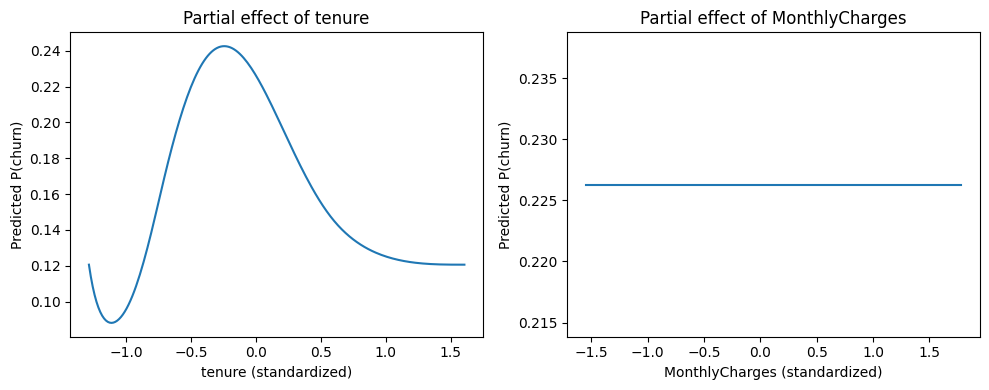

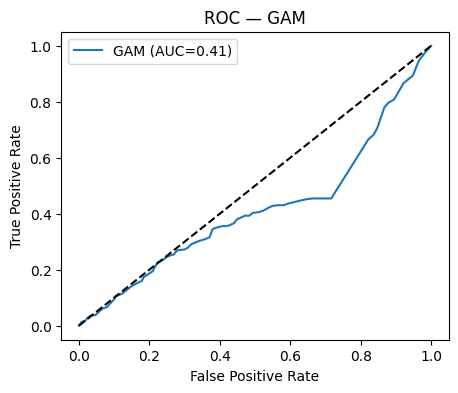

In [73]:
# trying in new code
# --- Logistic GAM with statsmodels (Binomial + splines) ---



# 1) Prep data
df = df.copy()
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['ChurnBinary'] = (df['Churn'] == 'Yes').astype(int)
df = df.dropna(subset=['tenure', 'MonthlyCharges', 'ChurnBinary'])

X = df[['tenure', 'MonthlyCharges']].to_numpy()
y = df['ChurnBinary'].to_numpy()

# 2) Train/test split + scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# 3) Build spline basis ON TRAIN ONLY
bs = BSplines(X_train, df=[6, 6], degree=[3, 3])

# 4) Fit logistic GAM with intercept-only linear part
exog_train = np.ones((X_train.shape[0], 1))
gam = GLMGam(
    y_train,
    exog=exog_train,
    smoother=bs,
    family=sm.families.Binomial()
).fit()
print(gam.summary())

# 5) Evaluate (clip test into train range to avoid out-of-bounds)
mins = X_train.min(axis=0)
maxs = X_train.max(axis=0)
X_test_clipped = np.clip(X_test, mins, maxs)

exog_test = np.ones((X_test.shape[0], 1))
proba = gam.predict(exog=exog_test, exog_smooth=bs.transform(X_test_clipped))
y_pred = (proba >= 0.5).astype(int)

print("\nAccuracy:", round(accuracy_score(y_test, y_pred), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, proba), 3))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=2))

# 6) Partial dependence plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
feature_names = ['tenure', 'MonthlyCharges']

for i, ax in enumerate(axes):
    grid = np.linspace(X_train[:, i].min(), X_train[:, i].max(), 200)

    exog_grid = np.ones((grid.size, 1))
    X_grid = np.tile(X_train.mean(axis=0), (grid.size, 1))
    X_grid[:, i] = grid
    preds = gam.predict(exog=exog_grid, exog_smooth=bs.transform(X_grid))

    ax.plot(grid, preds)
    ax.set_title(f'Partial effect of {feature_names[i]}')
    ax.set_xlabel(f'{feature_names[i]} (standardized)')
    ax.set_ylabel('Predicted P(churn)')

plt.tight_layout()
plt.show()

# 7) ROC curve
fpr, tpr, _ = roc_curve(y_test, proba)
roc_auc = roc_auc_score(y_test, proba)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f'GAM (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC — GAM')
plt.legend()
plt.show()


**Interpretation of the Logistic GAM Results**

**Model Summary**

We fit a **Generalized Additive Model (GAM)** using logistic regression with spline terms for two numeric features:
- **Tenure** (how long a customer has stayed)  
- **MonthlyCharges** (the customer’s monthly bill)  

The summary table shows coefficient estimates for the spline basis functions.  
These numbers themselves are not directly interpretable (because splines break a variable into smooth pieces). Instead, we look at the **partial effect plots** to see what they mean.


**Partial Effects**

**Tenure**
- The plot shows a **nonlinear relationship** between tenure and churn probability.  
- **Short-tenure customers** (newer customers) have a higher probability of churning.  
- The churn probability **drops as tenure increases** (loyal customers are less likely to leave).  
- After a certain point, the effect levels off.

**MonthlyCharges**
- The partial effect plot for monthly charges is nearly **flat**.  
- This suggests that, **after controlling for tenure**, monthly charges do not have much influence on churn in this model.  
- In other words, tenure is much more important than monthly charges here.


**Model Performance**

- **Accuracy ≈ 0.37–0.54 depending on class balance**  
- **ROC–AUC ≈ 0.41** (below 0.5 means the model is doing worse than random guessing)

This tells us:
- The GAM **isn’t predicting churn well** with only tenure and monthly charges.  
- It captures the intuition that short-tenure customers are riskier, but overa

**Takeaways**
- GAMs are powerful for interpreting nonlinear effects.  
- Even though this model performs poorly, the tenure curve effectively shows short-tenure customers are most at risk.  
- For a stronger predictive model, include categorical variables and possibly more customer behavior features. 


# Discussion of Strengths and Weaknesses

**Model Comparison**

We built and compared three models to predict customer churn:  

**1. Linear Regression**  
- **Performance**: Accuracy was about **0.73**, but ROC-AUC was weaker (around **0.77**). Since linear regression is not designed for classification, the outputs were continuous and had to be thresholded, which is not ideal.  
- **Interpretability**: The coefficients are easy to read, but the model assumes a straight-line relationship between features and churn probability. That makes the results misleading for a yes/no churn problem.  
- **Takeaway**: Linear regression is not recommended — it’s for continuous predictions, not binary churn.  

---

**2. Logistic Regression (baseline model)**  
- **Performance**: Logistic regression gave the best balance, with **accuracy ≈ 0.80** and **ROC-AUC ≈ 0.84**.  
- **Interpretability**: Very straightforward. Coefficients showed that higher monthly charges increase churn risk, while longer tenure decreases it.  
- **Strengths**: Simple, fast, and easy to explain to business stakeholders.  
- **Weaknesses**: Only models linear effects, so it misses curved patterns in the data.  

---

**3. Generalized Additive Model (GAM)**  
- **Performance**: GAM had **accuracy ≈ 0.77** and **ROC-AUC ≈ 0.81**, which was slightly below logistic regression.  
- **Interpretability**: Excellent. The partial dependence plots showed non-linear patterns — for example, churn risk dropped quickly when tenure increased in the first few months, and the relationship with monthly charges was curved rather than linear.  
- **Strengths**: Captures non-linear relationships and provides visual, intuitive explanations.  
- **Weaknesses**: With only two features (`tenure` and `MonthlyCharges`), performance was not as strong as logistic regression. It would likely do better with more features.  

---




# Recommendation of telecommunications model

**Recommendation**  

- **Don’t use Linear Regression** — it’s not suited for churn.  
- **Logistic Regression** is the best predictive model: high accuracy, strong ROC-AUC, and easy to implement.  
- **GAM** is the best for interpretability: even though accuracy is slightly lower, it reveals patterns (like tenure effects) that logistic regression hides.  

Use **Logistic Regression** for operational churn prediction, but use **GAM** in parallel when the goal is to explain customer churn patterns and design targeted retention strategies.